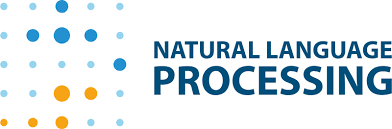

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
emoji_data=pd.read_csv("EmoTag1200-scores.csv",encoding='latin-1')
emoji_data

,unicode,emoji,name,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,1F308,ð,rainbow,0.00,0.28,0.00,0.00,0.69,0.06,0.22,0.33
1,1F319,ð,crescent moon,0.00,0.31,0.00,0.00,0.25,0.00,0.06,0.25
2,1F31A,ð,new moon face,0.06,0.08,0.17,0.06,0.42,0.19,0.06,0.11
3,1F31E,ð,sun with face,0.00,0.22,0.00,0.00,0.78,0.00,0.11,0.22
4,1F31F,ð,glowing star,0.00,0.28,0.00,0.00,0.53,0.00,0.25,0.31
...,...,...,...,...,...,...,...,...,...,...,...
145,2757,â,exclamation mark,0.44,0.42,0.31,0.42,0.08,0.17,0.81,0.11
146,2764,â¤,red heart,0.00,0.36,0.00,0.00,0.69,0.00,0.14,0.67
147,27A1,â¡,right arrow,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.22
148,2B05,â¬,left arrow,0.17,0.14,0.17,0.14,0.00,0.14,0.03,0.06


In [3]:
emoji_data.dtypes

unicode          object
emoji            object
name             object
anger           float64
anticipation    float64
disgust         float64
fear            float64
joy             float64
sadness         float64
surprise        float64
trust           float64
dtype: object

In [4]:
emoji_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unicode       150 non-null    object 
 1   emoji         150 non-null    object 
 2   name          150 non-null    object 
 3   anger         150 non-null    float64
 4   anticipation  150 non-null    float64
 5   disgust       150 non-null    float64
 6   fear          150 non-null    float64
 7   joy           150 non-null    float64
 8   sadness       150 non-null    float64
 9   surprise      150 non-null    float64
 10  trust         150 non-null    float64
dtypes: float64(8), object(3)
memory usage: 13.0+ KB


In [5]:
emoji_data.shape

(150, 11)

In [6]:
emoji_data.tail()

,unicode,emoji,name,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
145,2757,â,exclamation mark,0.44,0.42,0.31,0.42,0.08,0.17,0.81,0.11
146,2764,â¤,red heart,0.00,0.36,0.00,0.00,0.69,0.00,0.14,0.67
147,27A1,â¡,right arrow,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.22
148,2B05,â¬,left arrow,0.17,0.14,0.17,0.14,0.00,0.14,0.03,0.06
149,2B50,â­,star,0.00,0.17,0.00,0.00,0.39,0.00,0.17,0.22


In [7]:
emoji = emoji_data.loc[(emoji_data!=0).all(axis=1)]
emoji

,unicode,emoji,name,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
2,1F31A,ð,new moon face,0.06,0.08,0.17,0.06,0.42,0.19,0.06,0.11
11,1F355,ð,pizza,0.06,0.39,0.06,0.06,0.47,0.06,0.17,0.17
14,1F388,ð,balloon,0.06,0.25,0.06,0.06,0.47,0.06,0.31,0.22
29,1F44D,ð,thumbs up,0.11,0.39,0.06,0.08,0.39,0.06,0.14,0.47
34,1F480,ð,skull,0.19,0.14,0.25,0.61,0.03,0.31,0.06,0.11
35,1F481,ð,person tipping hand,0.08,0.33,0.08,0.06,0.14,0.06,0.17,0.25
45,1F498,ð,heart with arrow,0.03,0.31,0.06,0.06,0.67,0.14,0.06,0.64
51,1F4A4,ð¤,zzz,0.06,0.36,0.19,0.06,0.11,0.14,0.06,0.22
52,1F4A5,ð¥,collision,0.44,0.19,0.19,0.31,0.11,0.14,0.31,0.08
57,1F4AD,ð­,thought balloon,0.11,0.64,0.11,0.11,0.17,0.11,0.17,0.22


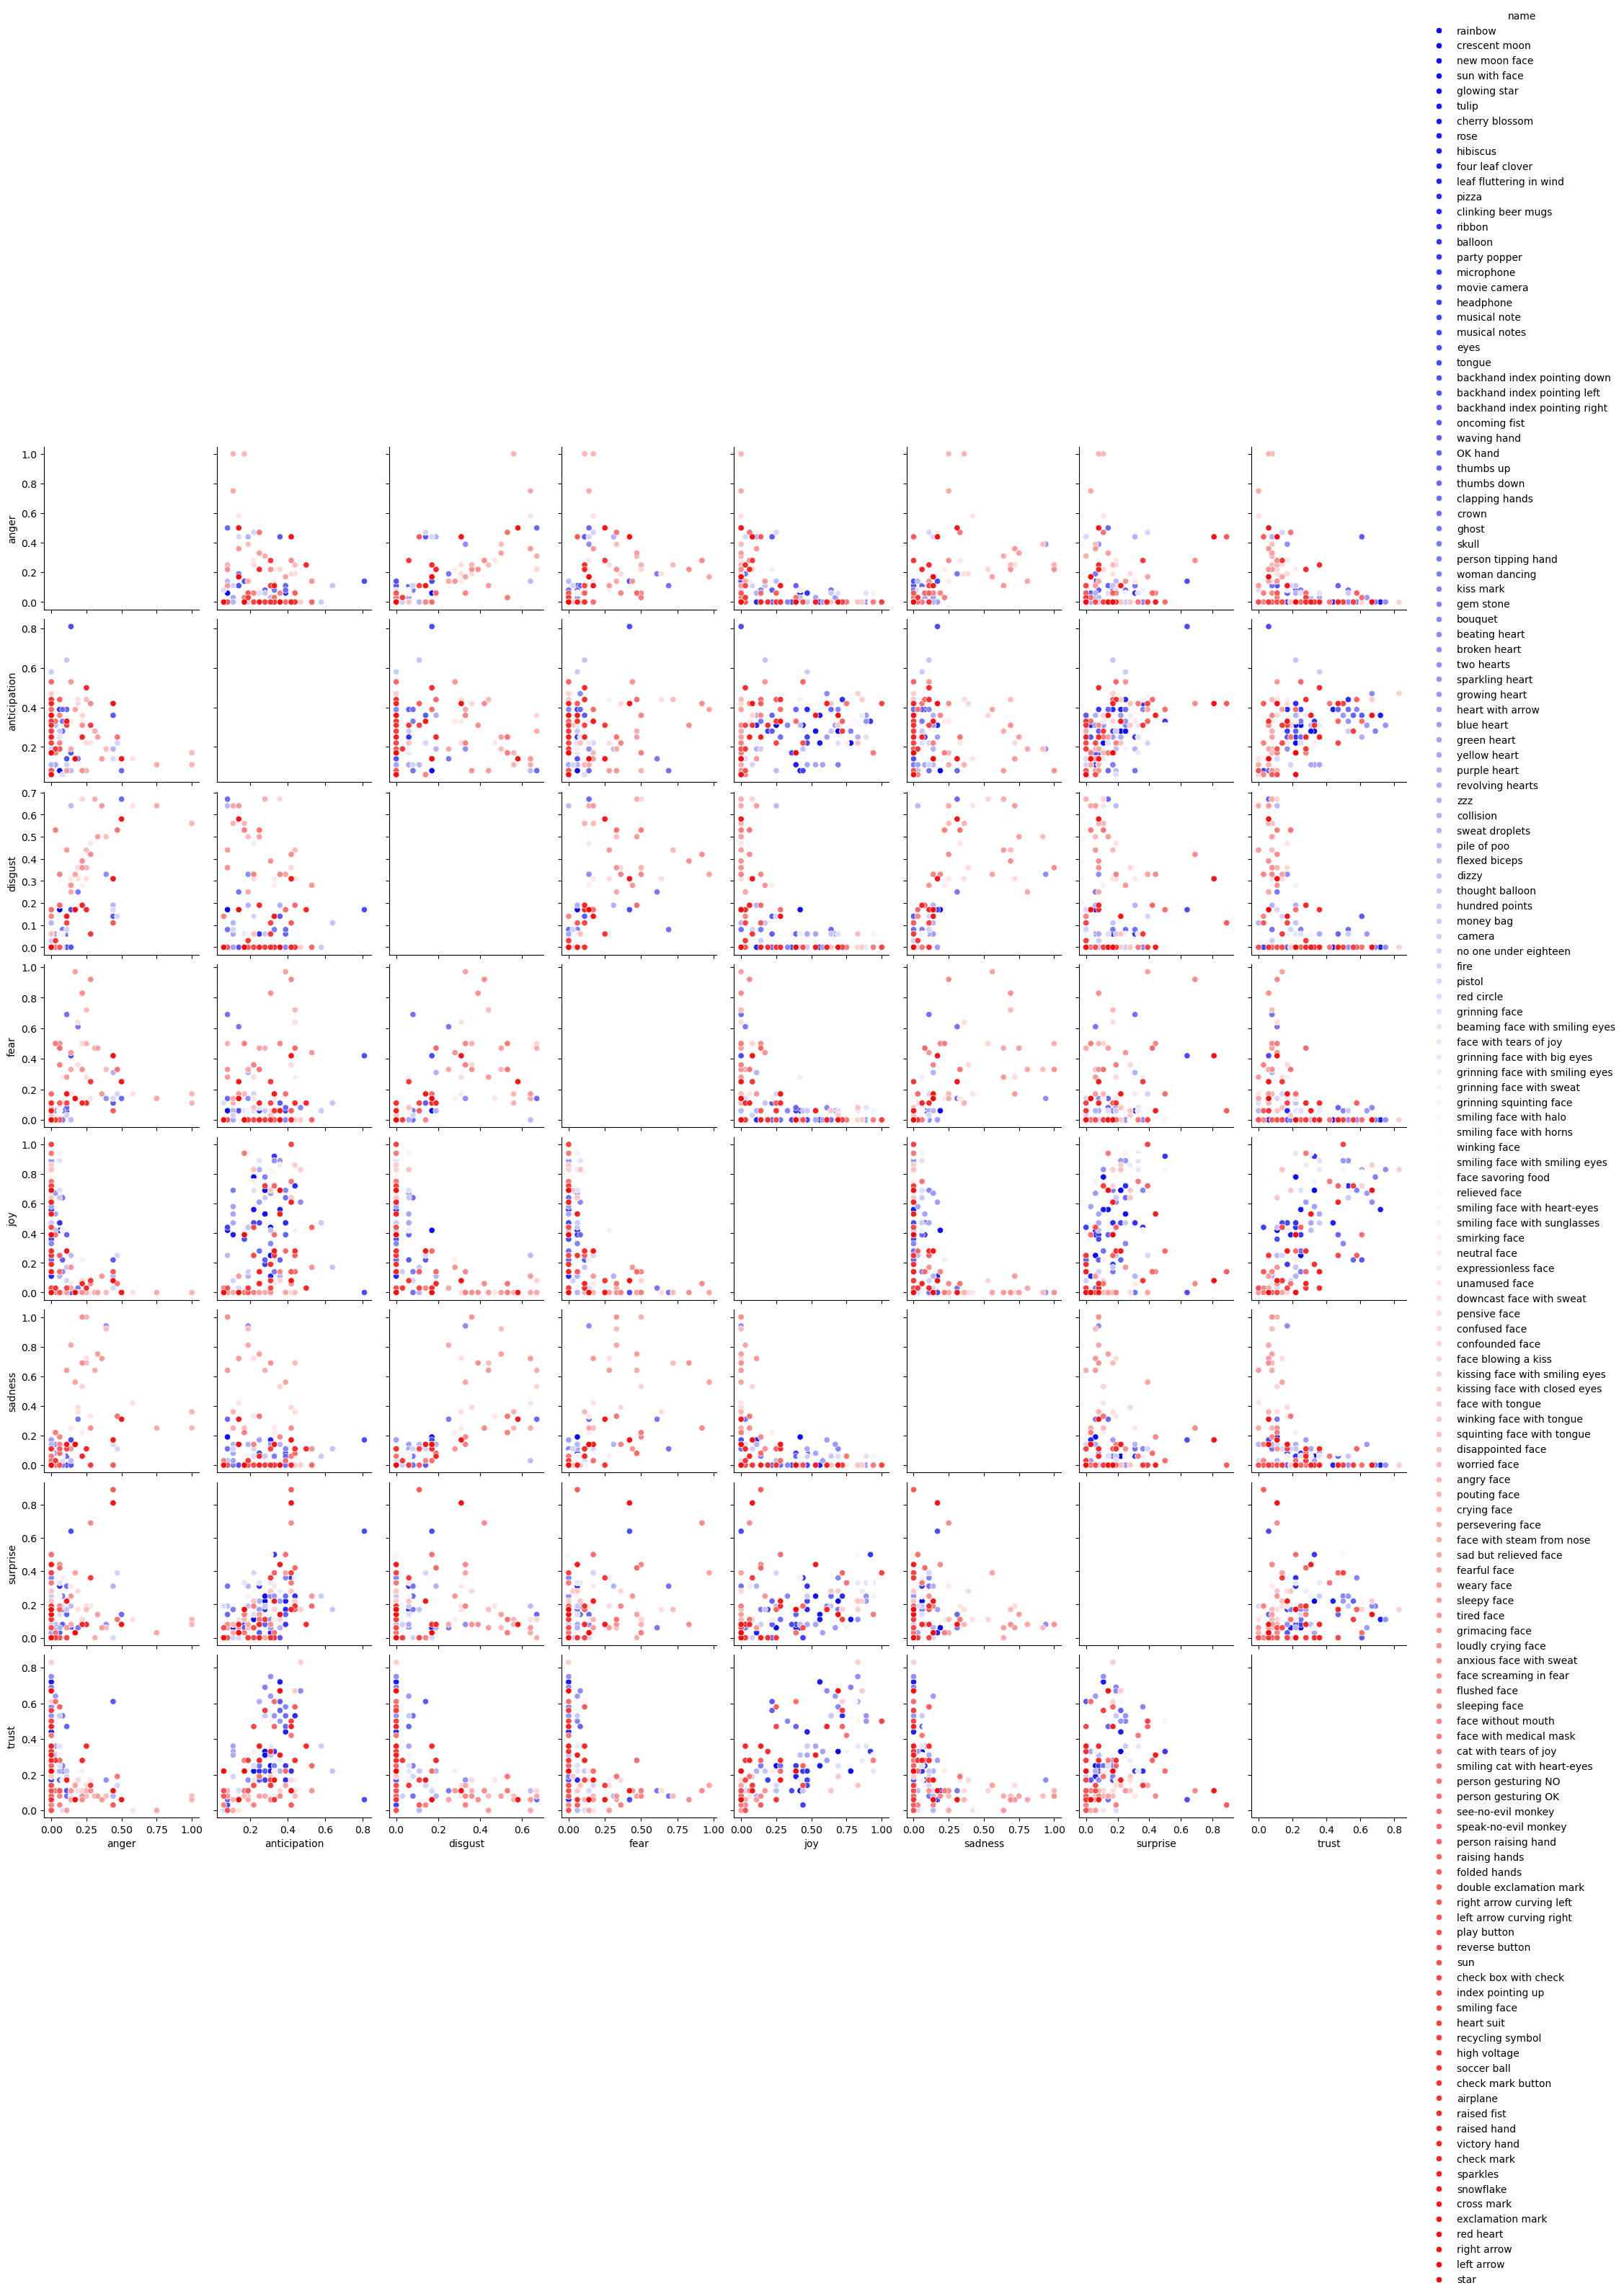

In [8]:
sns.pairplot(emoji_data,palette='bwr',hue='name' )

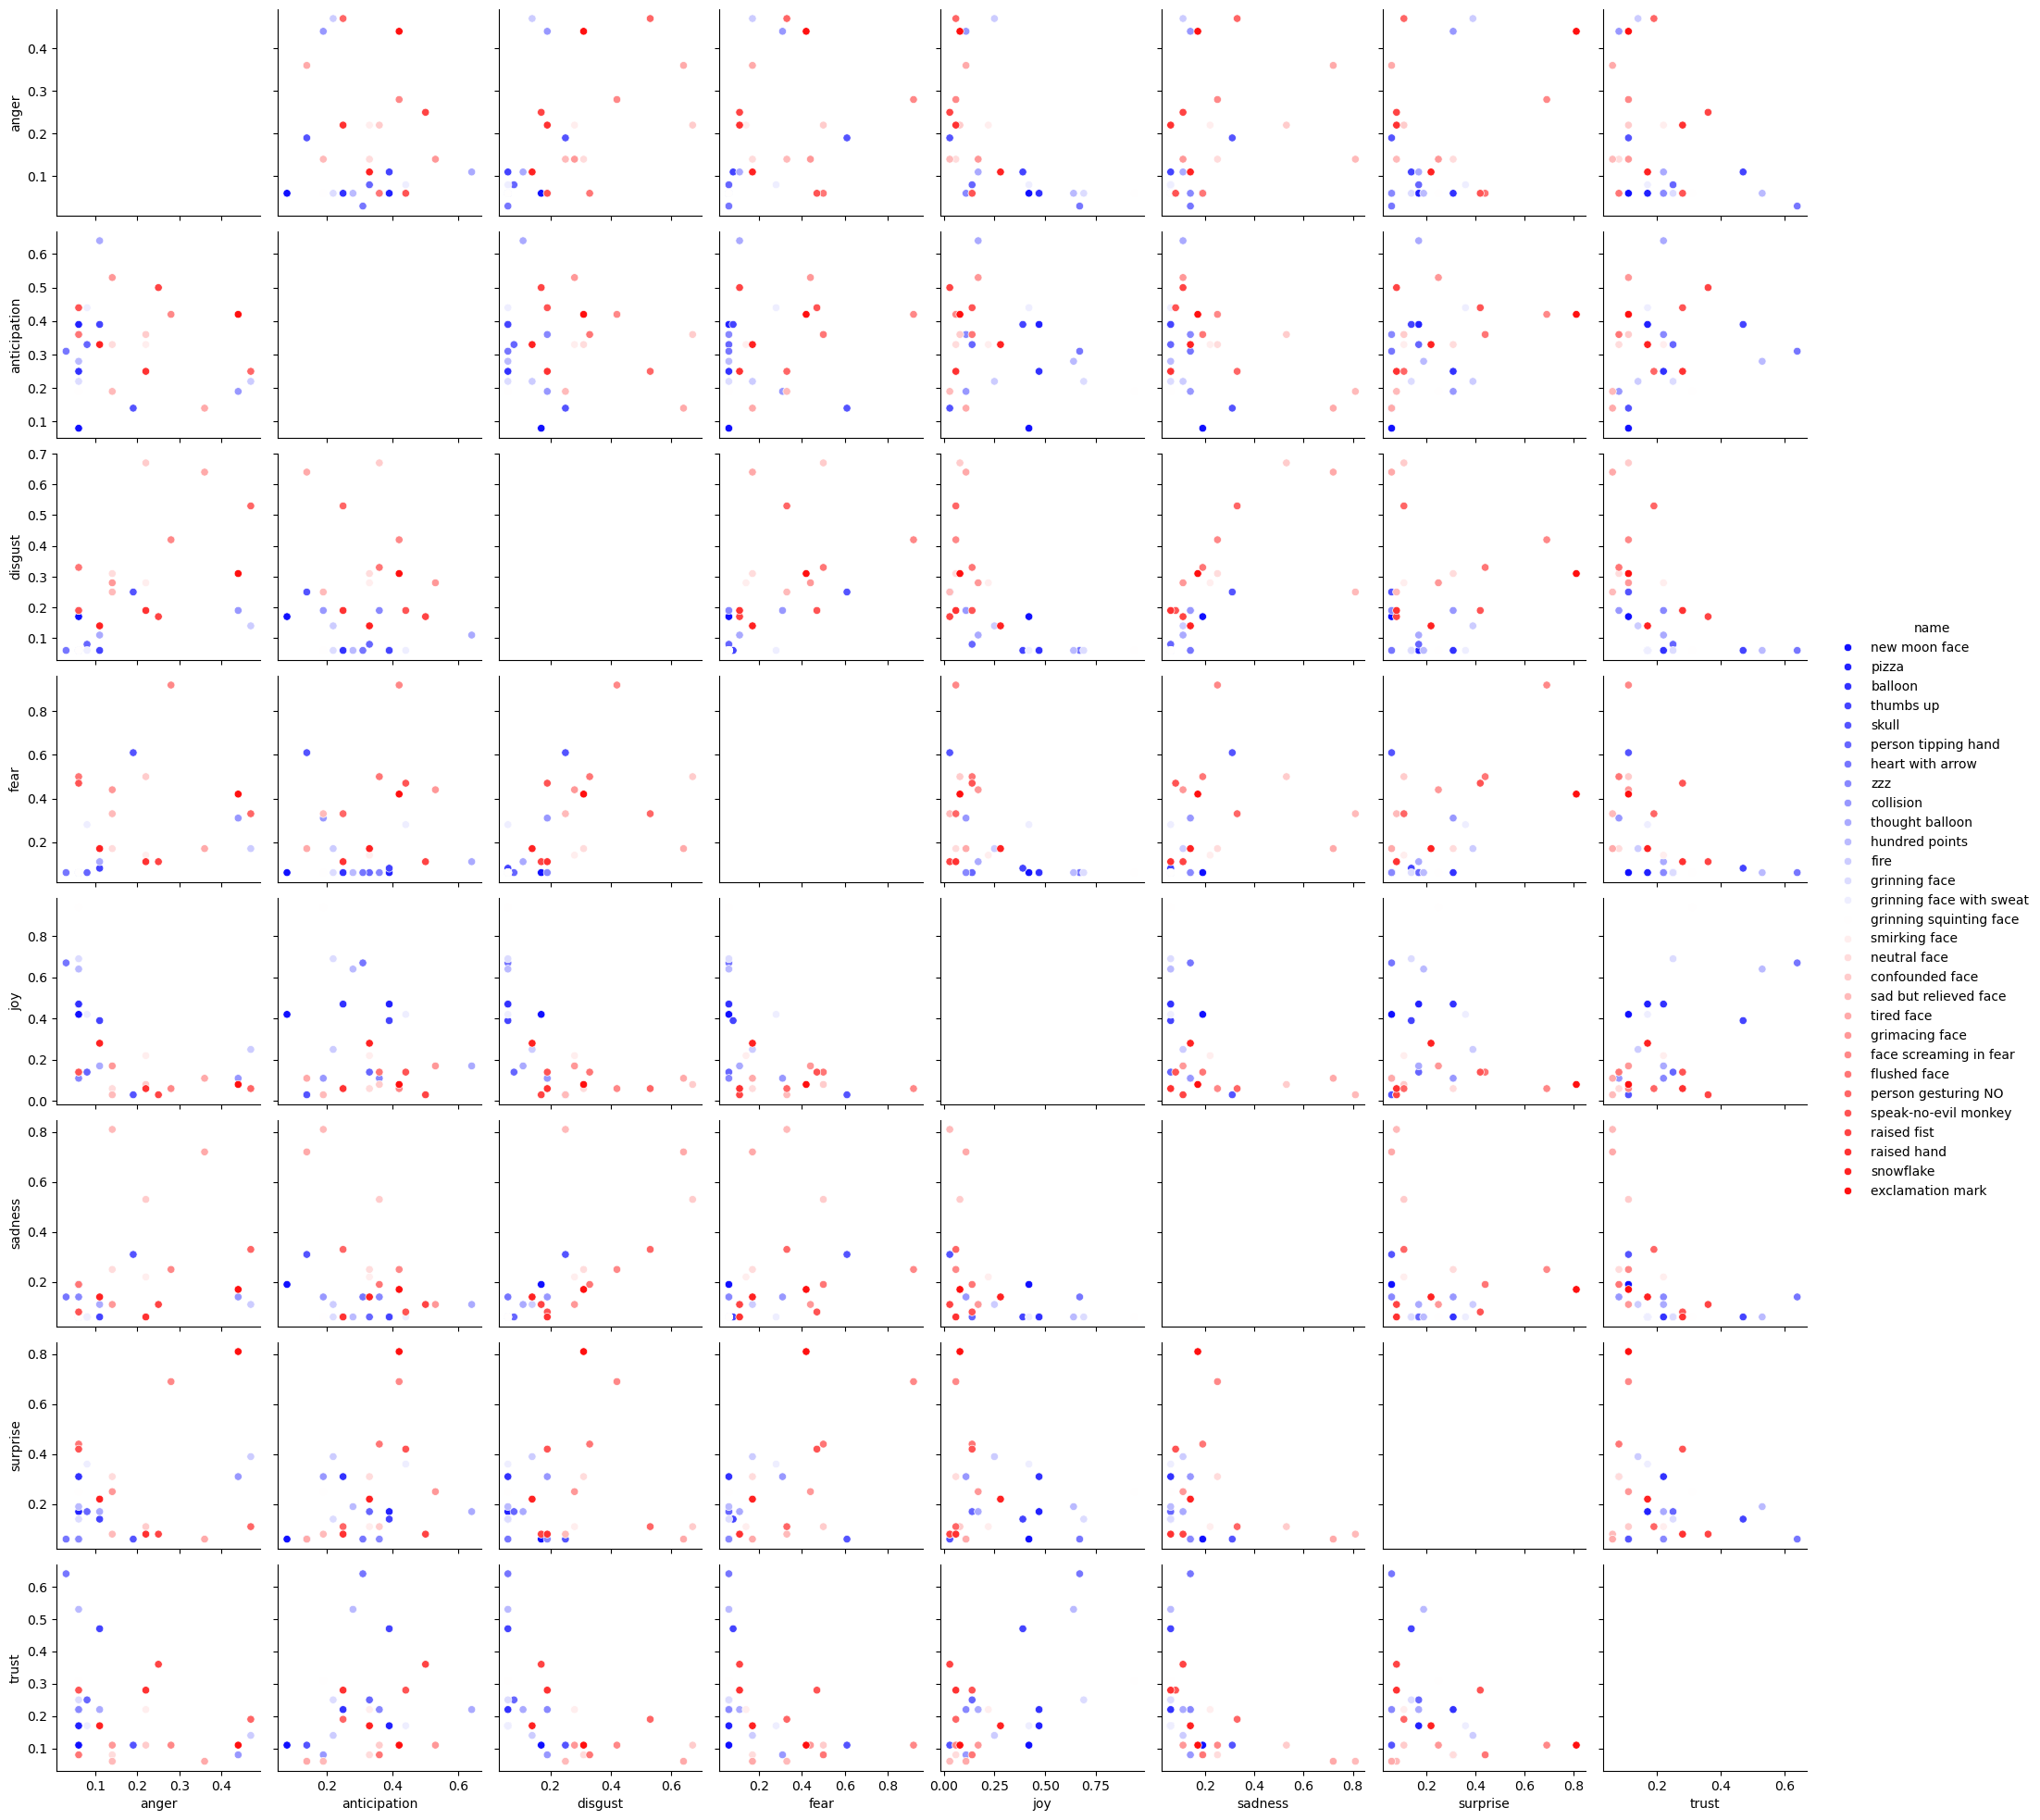

In [9]:
sns.pairplot(emoji,palette='bwr',hue='name' )

In [10]:
emoji.keys()

Index(['unicode', 'emoji', 'name', 'anger', 'anticipation', 'disgust', 'fear',
       'joy', 'sadness', 'surprise', 'trust'],
      dtype='object')

In [11]:
emoji.isnull().sum()

unicode         0
emoji           0
name            0
anger           0
anticipation    0
disgust         0
fear            0
joy             0
sadness         0
surprise        0
trust           0
dtype: int64

In [12]:
emoji[emoji['name'].isna() == True]

,unicode,emoji,name,anger,anticipation,disgust,fear,joy,sadness,surprise,trust


In [13]:
print(f" name column : {emoji.iloc[10]['name']}") 
print(f" anger :  {emoji.iloc[10]['anger']}")
print(f" joy : {emoji.iloc[10]['joy']}")  
print(f" sadness : {emoji.iloc[10]['sadness']}") 

 name column : hundred points
 anger :  0.06
 joy : 0.64
 sadness : 0.06


In [14]:
len(emoji)

29

In [15]:
print(f" name word count:\n{emoji['name'].value_counts()}")

 name word count:
name
new moon face               1
smirking face               1
snowflake                   1
raised hand                 1
raised fist                 1
speak-no-evil monkey        1
person gesturing NO         1
flushed face                1
face screaming in fear      1
grimacing face              1
tired face                  1
sad but relieved face       1
confounded face             1
neutral face                1
grinning squinting face     1
pizza                       1
grinning face with sweat    1
grinning face               1
fire                        1
hundred points              1
thought balloon             1
collision                   1
zzz                         1
heart with arrow            1
person tipping hand         1
skull                       1
thumbs up                   1
balloon                     1
exclamation mark            1
Name: count, dtype: int64


In [16]:
print(f" name word count:\n{emoji['sadness'].value_counts()}")

 name word count:
sadness
0.06    9
0.14    4
0.11    4
0.19    2
0.25    2
0.31    1
0.22    1
0.53    1
0.81    1
0.72    1
0.33    1
0.08    1
0.17    1
Name: count, dtype: int64


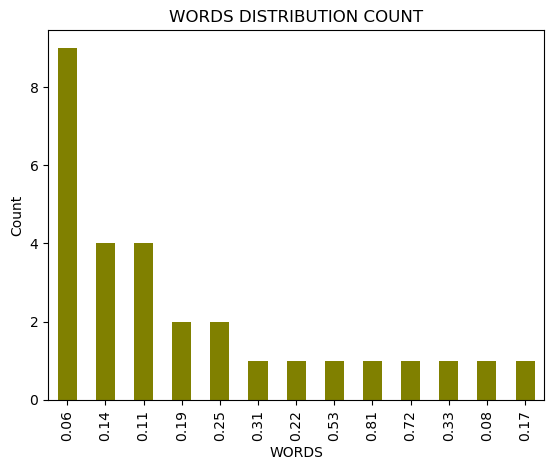

In [17]:
emoji['sadness'].value_counts().plot.bar(color = 'olive')
plt.title('WORDS DISTRIBUTION COUNT')
plt.xlabel('WORDS')
plt.ylabel('Count')
plt.show()

In [18]:
print(f"word count - percentage distribution: \n{round(emoji['sadness'].value_counts()/emoji.shape[0]*100)}")

word count - percentage distribution: 
sadness
0.06    31.0
0.14    14.0
0.11    14.0
0.19     7.0
0.25     7.0
0.31     3.0
0.22     3.0
0.53     3.0
0.81     3.0
0.72     3.0
0.33     3.0
0.08     3.0
0.17     3.0
Name: count, dtype: float64


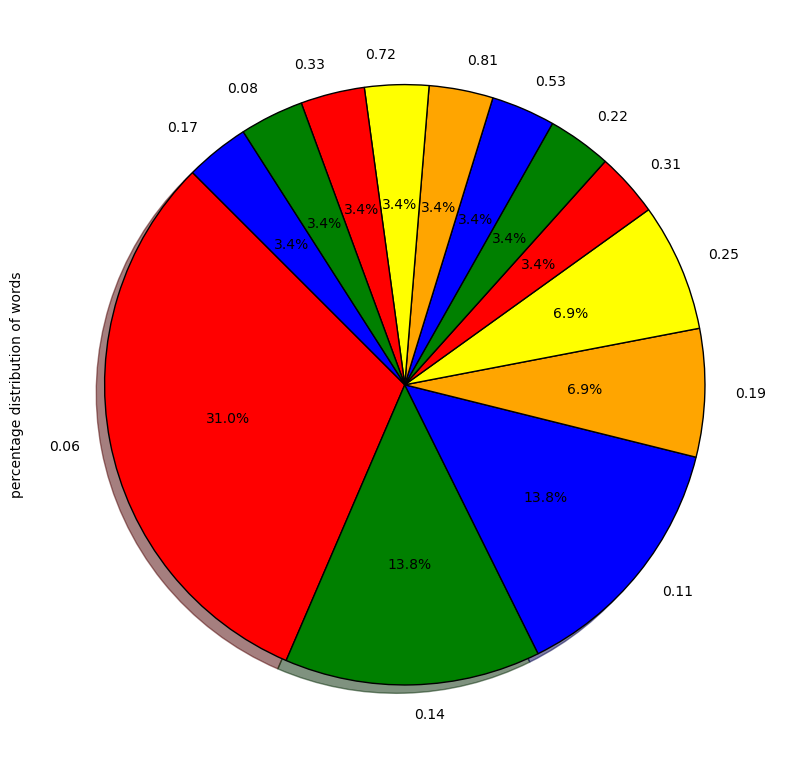

In [19]:
fig = plt.figure(figsize=(8,8))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = emoji['sadness'].value_counts()/emoji.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=135, wedgeprops=wp,
          label='percentage distribution of words')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")
fig.set_tight_layout(True)

In [20]:
formal = emoji[emoji['sadness'] ==0.25]
formal

,unicode,emoji,name,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
81,1F610,ð,neutral face,0.14,0.33,0.31,0.17,0.06,0.25,0.31,0.08
109,1F631,ð±,face screaming in fear,0.28,0.42,0.42,0.92,0.06,0.25,0.69,0.11


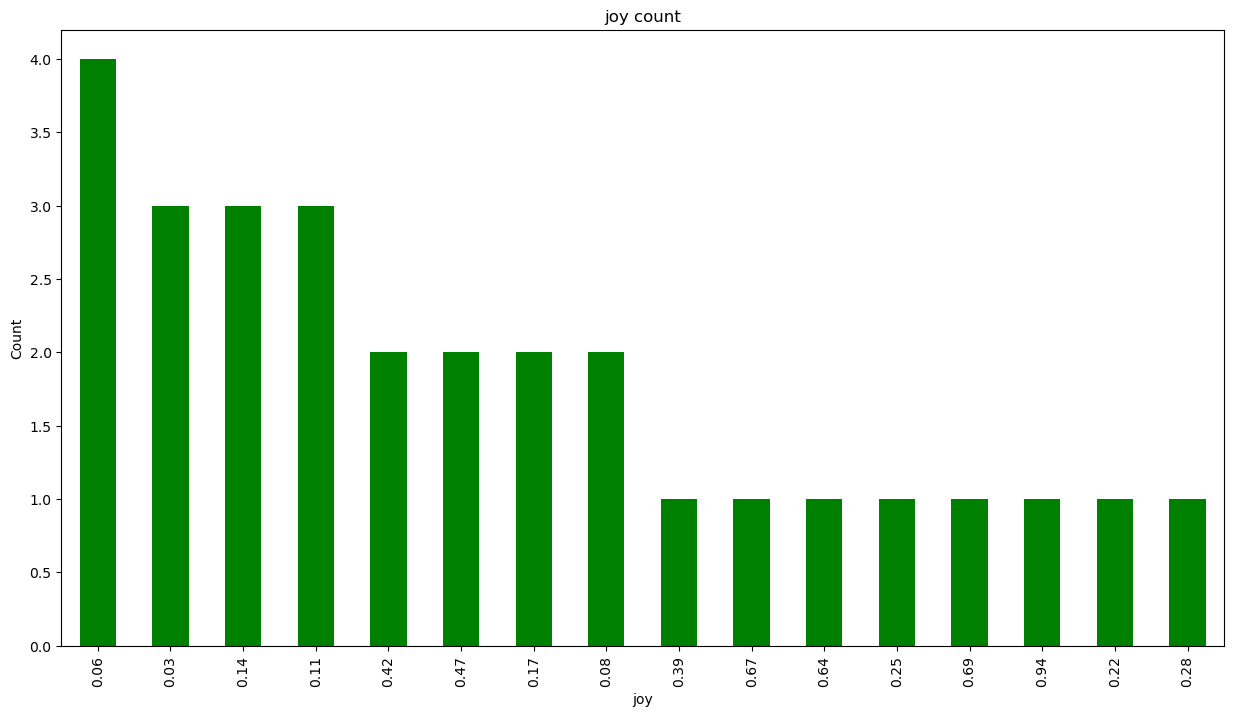

In [21]:
fig = plt.figure(figsize=(15,8))
emoji['joy'].value_counts().plot.bar(color = 'green')
plt.title('joy count')
plt.xlabel('joy')
plt.ylabel('Count')
plt.show()

In [22]:
print(f"joy value count - percentage distribution: \n{round(emoji['joy'].value_counts()/emoji.shape[0]*100)}")

joy value count - percentage distribution: 
joy
0.06    14.0
0.03    10.0
0.14    10.0
0.11    10.0
0.42     7.0
0.47     7.0
0.17     7.0
0.08     7.0
0.39     3.0
0.67     3.0
0.64     3.0
0.25     3.0
0.69     3.0
0.94     3.0
0.22     3.0
0.28     3.0
Name: count, dtype: float64


In [23]:
emoji[emoji['joy'] ==0.25]['joy'].value_counts()

joy
0.25    1
Name: count, dtype: int64

In [24]:
emoji.groupby('name')['joy'].mean()

name
balloon                     0.47
collision                   0.11
confounded face             0.08
exclamation mark            0.08
face screaming in fear      0.06
fire                        0.25
flushed face                0.14
grimacing face              0.17
grinning face               0.69
grinning face with sweat    0.42
grinning squinting face     0.94
heart with arrow            0.67
hundred points              0.64
neutral face                0.06
new moon face               0.42
person gesturing NO         0.06
person tipping hand         0.14
pizza                       0.47
raised fist                 0.03
raised hand                 0.06
sad but relieved face       0.03
skull                       0.03
smirking face               0.22
snowflake                   0.28
speak-no-evil monkey        0.14
thought balloon             0.17
thumbs up                   0.39
tired face                  0.11
zzz                         0.11
Name: joy, dtype: float64

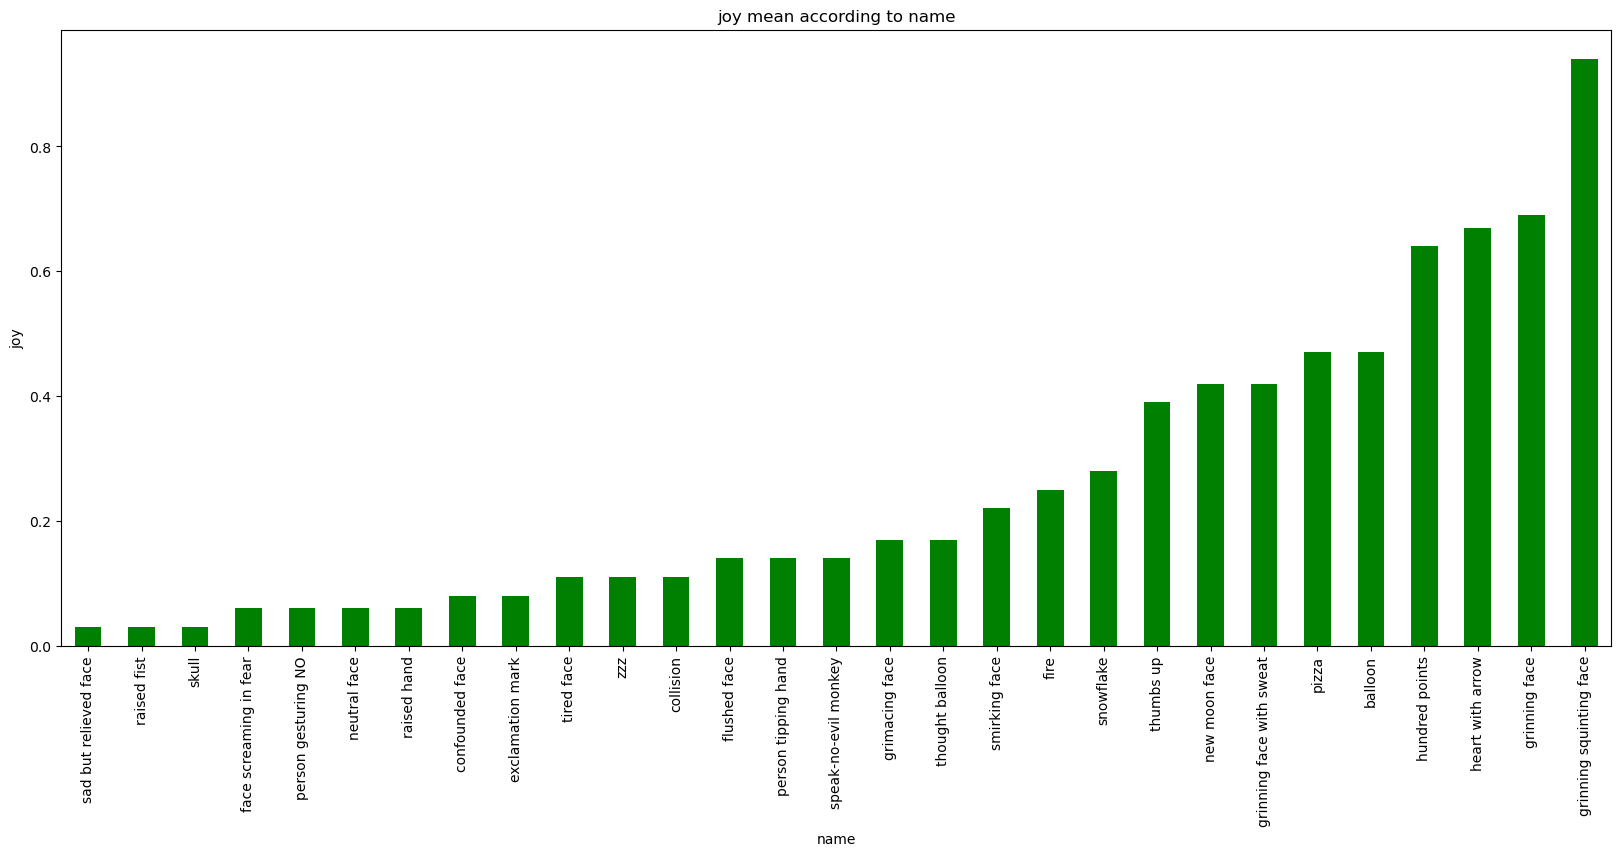

In [25]:
emoji.groupby('name')['joy'].mean().sort_values().plot.bar(color = 'green', figsize=(20, 8))
plt.title("joy mean according to name")
plt.xlabel('name')
plt.ylabel('joy')
plt.show()

In [26]:
emoji['joy'].describe()

count    29.000000
mean      0.256552
std       0.241147
min       0.030000
25%       0.080000
50%       0.140000
75%       0.420000
max       0.940000
Name: joy, dtype: float64

In [27]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(emoji.name)

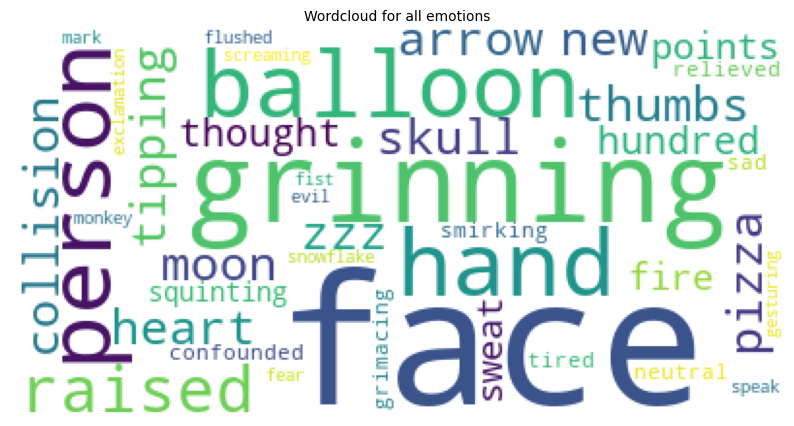

In [28]:
# Combine all emoji
all = " ".join([joy for joy in emoji['name']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=150)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(all))
plt.title('Wordcloud for all emotions', fontsize=10)
plt.axis('off')
plt.show()

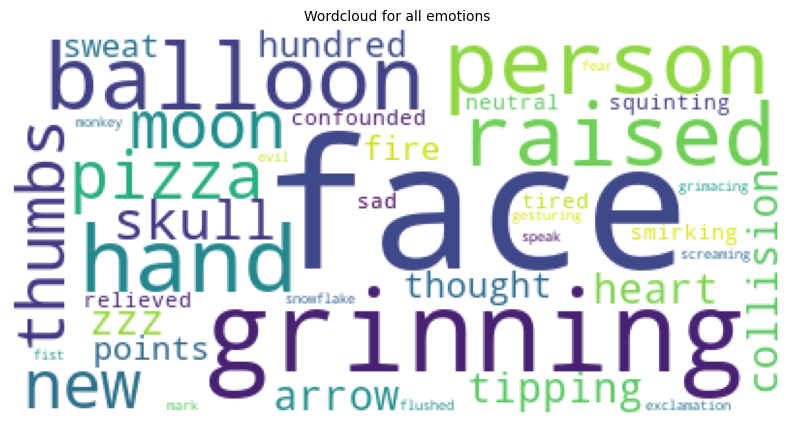

In [29]:
# Combine all emoji
all = " ".join([sadness for sadness in emoji['name']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=150)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(all))
plt.title('Wordcloud for all emotions', fontsize=10)
plt.axis('off')
plt.show()

[Text(0.5, 1.0, 'Distribution of length of joy ')]

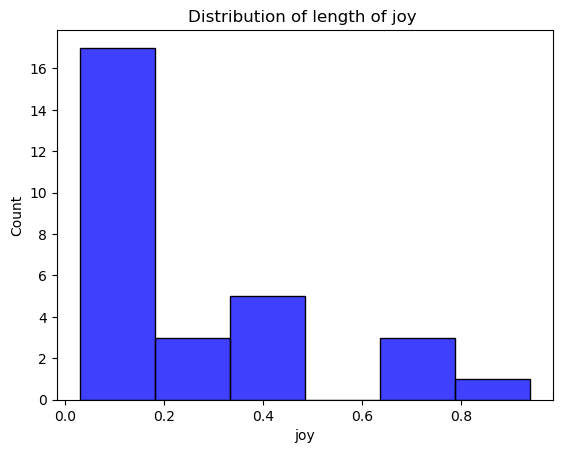

In [30]:
sns.histplot(emoji['joy'],color='blue').set(title='Distribution of length of joy ')

In [31]:
import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [32]:
nopunc

'Sample message Notice it has punctuation'

In [33]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [34]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [35]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [36]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [37]:
emoji['name'].head(5).apply(text_process)

2     [new, moon, face]
11              [pizza]
14            [balloon]
29             [thumbs]
34              [skull]
Name: name, dtype: object

In [38]:
emoji.head()

,unicode,emoji,name,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
2,1F31A,ð,new moon face,0.06,0.08,0.17,0.06,0.42,0.19,0.06,0.11
11,1F355,ð,pizza,0.06,0.39,0.06,0.06,0.47,0.06,0.17,0.17
14,1F388,ð,balloon,0.06,0.25,0.06,0.06,0.47,0.06,0.31,0.22
29,1F44D,ð,thumbs up,0.11,0.39,0.06,0.08,0.39,0.06,0.14,0.47
34,1F480,ð,skull,0.19,0.14,0.25,0.61,0.03,0.31,0.06,0.11


In [39]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(emoji['name'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

39


In [40]:
emoji4 = emoji['name']
print(emoji4)

2                 new moon face
11                        pizza
14                      balloon
29                    thumbs up
34                        skull
35          person tipping hand
45             heart with arrow
51                          zzz
52                    collision
57              thought balloon
58               hundred points
62                         fire
65                grinning face
70     grinning face with sweat
71      grinning squinting face
80                smirking face
81                 neutral face
87              confounded face
101       sad but relieved face
105                  tired face
106              grimacing face
109      face screaming in fear
110                flushed face
116         person gesturing NO
119        speak-no-evil monkey
138                 raised fist
139                 raised hand
143                   snowflake
145            exclamation mark
Name: name, dtype: object


In [41]:
bow4 = bow_transformer.transform([emoji4])
print(bow4)
print(bow4.shape)

  (0, 5)	1
  (0, 10)	1
  (0, 16)	1
  (0, 18)	1
  (0, 20)	1
  (0, 25)	1
  (0, 27)	1
  (0, 32)	1
  (0, 36)	1
(1, 39)


In [42]:
print(bow_transformer.get_feature_names_out()[5])
print(bow_transformer.get_feature_names_out()[10])
print(bow_transformer.get_feature_names_out()[16])
print(bow_transformer.get_feature_names_out()[18])
print(bow_transformer.get_feature_names_out()[20])
print(bow_transformer.get_feature_names_out()[25])
print(bow_transformer.get_feature_names_out()[27])
print(bow_transformer.get_feature_names_out()[32])
print(bow_transformer.get_feature_names_out()[36])

face
gesturing
mark
moon
new
relieved
screaming
squinting
tipping


In [43]:
emoji_bow = bow_transformer.transform(emoji['name'])

In [44]:
print('Shape of Sparse Matrix: ', emoji_bow.shape)
print('Amount of Non-Zero occurences: ', emoji_bow.nnz)

Shape of Sparse Matrix:  (29, 39)
Amount of Non-Zero occurences:  56


In [45]:
sparsity = (100.0 * emoji_bow.nnz / (emoji_bow.shape[0] * emoji_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 5


## TERM FREQUENCY

In [46]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(emoji_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 36)	0.3482560294589878
  (0, 32)	0.3482560294589878
  (0, 27)	0.3482560294589878
  (0, 25)	0.3482560294589878
  (0, 20)	0.3482560294589878
  (0, 18)	0.3482560294589878
  (0, 16)	0.3482560294589878
  (0, 10)	0.3482560294589878
  (0, 5)	0.1724584111131865


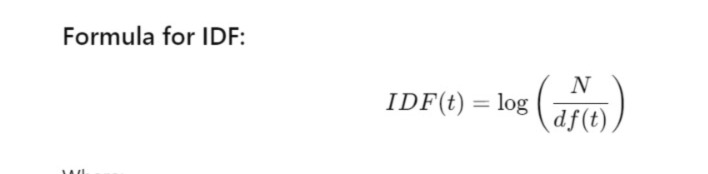

In [47]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['face']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['hand']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['fire']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['zzz']])

1.8362480242006185
3.302585092994046
3.70805020110221
3.70805020110221


In [48]:
emoji_tfidf = tfidf_transformer.transform(emoji_bow)
print(emoji_tfidf.shape)

(29, 39)


## NLP Classification Task

In [49]:
X = emoji_data[['joy', 'sadness', 'anger','fear','surprise']]
y = emoji_data['name']

In [50]:
X.shape

(150, 5)

In [51]:
y.shape

(150,)

## TRAIN THE DATA SET

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (120, 5)
X_test shape: (30, 5)
y_train shape: (120,)
y_test shape: (30,)


In [54]:
print(f"X train max value:{X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value:joy         0.94
sadness     1.00
anger       1.00
fear        0.97
surprise    0.89
dtype: float64
X test max value: joy         1.00
sadness     0.69
anger       0.50
fear        0.83
surprise    0.81
dtype: float64


In [55]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, emoji_data.shape[0]):
  pic = re.sub('[^a-zA-Z]', ' ', emoji_data.iloc[i]['name'])
  pic = pic.lower().split()
  pic = [stemmer.stem(word) for word in pic if not word in STOPWORDS]
  pic = ' '.join(pic)
  corpus.append(pic)

In [56]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = emoji_data[['joy', 'sadness', 'anger','fear','surprise']]

In [57]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (150, 163)
y shape: (150, 5)


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (105, 163)
y train: (105, 5)
X test: (45, 163)
y test: (45, 5)


In [59]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [60]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

## RandomForestRegressor

In [61]:
#Fitting scaled X_train and y_train on Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [62]:
rf.fit(X_train_scl, y_train)

RandomForestRegressor(random_state=42)

In [63]:
print("Training Accuracy :", rf.score(X_train_scl, y_train))
print("Testing Accuracy :", rf.score(X_test_scl, y_test))

Training Accuracy : 0.8702262196266343
Testing Accuracy : 0.2960873392304245


In [64]:
y_preds =rf.predict(X_test_scl)

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [66]:
mse = mean_squared_error(y_test, y_preds, multioutput='uniform_average')
mae = mean_absolute_error(y_test, y_preds)
r2 = r2_score(y_test, y_preds)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.03307219258577779
Mean Absolute Error: 0.12025401481481482
R² Score: 0.2960873392304245


1. Mean Squared Error (MSE): 0.0331
MSE measures the average squared difference between the predicted and actual values. A lower MSE indicates better performance.
Interpretation: On average, the square of the difference between your model's predictions and the actual values is about 0.0356. This is a relatively small error, depending on the scale of your target variable.
2. Mean Absolute Error (MAE): 0.1202
MAE measures the average absolute difference between the predicted and actual values. It gives an idea of how far off the predictions are from the actual values, on average.
Interpretation: The predictions are, on average, about 0.1202 units away from the actual values.
3. R² Score: 0.3612
The R² score (Coefficient of Determination) measures how well your model explains the variance in the data. An R² score of 0.29 indicates prediction, while an R² score of 0 means the model has no predictive power.
Interpretation: Your model explains about 36.12% of the variance in the data. While this is somewhat low, it indicates the model captures some of the underlying patterns in the data but still leaves room for improvement.

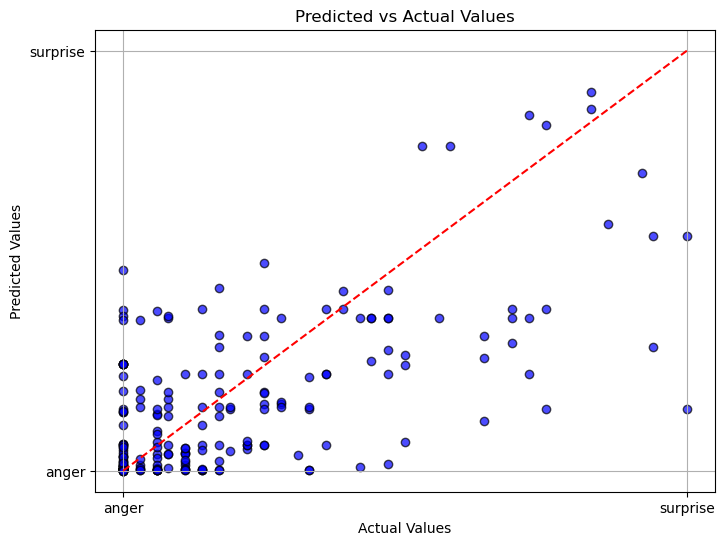

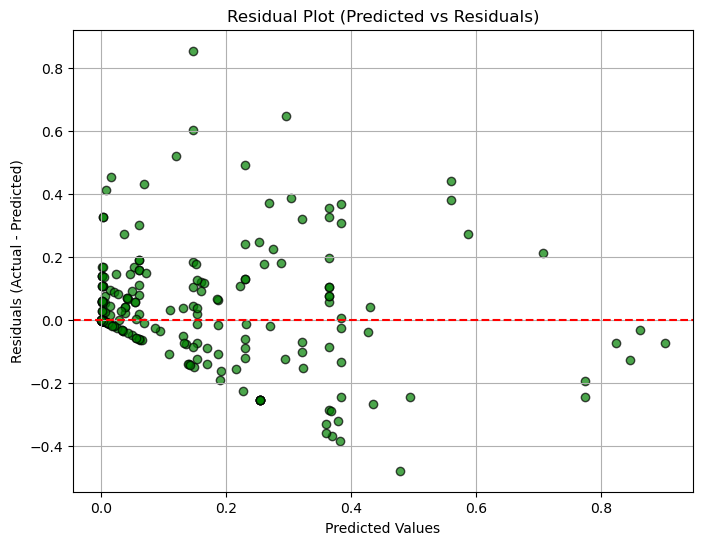

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test are the actual values and y_pred are the predicted values
# y_test and y_pred are numpy arrays or lists from your regression

# 1. Predicted vs Actual Values Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_preds, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line for reference
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# 2. Residual Plot (Errors vs Predicted Values)
residuals = y_test - y_preds  # Calculate residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_preds, residuals, color='green', edgecolor='k', alpha=0.7)
plt.axhline(0, color='r', linestyle='--')  # Horizontal line at 0 for reference
plt.title("Residual Plot (Predicted vs Residuals)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()


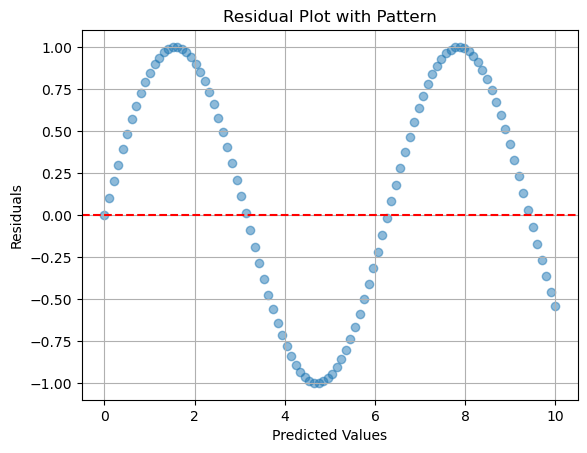

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
y_pred = np.linspace(0, 10, 100)
residuals = np.sin(y_pred)  # Residuals with a pattern

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot with Pattern')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [69]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(emoji_tfidf, emoji['name'])

In [70]:
print('predicted:', model.predict(tfidf4))
print('expected:', emoji.name[2])

predicted: ['new moon face']
expected: new moon face


In [71]:
all_predictions = model.predict(emoji_tfidf)
print(all_predictions)

['new moon face' 'pizza' 'balloon' 'thumbs up' 'skull'
 'person tipping hand' 'heart with arrow' 'zzz' 'collision'
 'thought balloon' 'hundred points' 'fire' 'grinning face'
 'grinning face with sweat' 'grinning squinting face' 'smirking face'
 'neutral face' 'confounded face' 'sad but relieved face' 'tired face'
 'grimacing face' 'face screaming in fear' 'flushed face'
 'person gesturing NO' 'speak-no-evil monkey' 'raised fist' 'raised hand'
 'snowflake' 'exclamation mark']


In [72]:
from sklearn.metrics import classification_report
print (classification_report(emoji['name'], all_predictions))

                          precision    recall  f1-score   support

                 balloon       1.00      1.00      1.00         1
               collision       1.00      1.00      1.00         1
         confounded face       1.00      1.00      1.00         1
        exclamation mark       1.00      1.00      1.00         1
  face screaming in fear       1.00      1.00      1.00         1
                    fire       1.00      1.00      1.00         1
            flushed face       1.00      1.00      1.00         1
          grimacing face       1.00      1.00      1.00         1
           grinning face       1.00      1.00      1.00         1
grinning face with sweat       1.00      1.00      1.00         1
 grinning squinting face       1.00      1.00      1.00         1
        heart with arrow       1.00      1.00      1.00         1
          hundred points       1.00      1.00      1.00         1
            neutral face       1.00      1.00      1.00         1
         

In [73]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [74]:
name_train, name_test, unicode_train, unicode_test = \
train_test_split(emoji['name'], emoji['unicode'], test_size=0.2)

In [75]:
pipeline.fit(name_train,unicode_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001CE1D24D9E0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [76]:
predictions = pipeline.predict(name_test)

In [77]:
print(classification_report(predictions,unicode_test, zero_division=1))

              precision    recall  f1-score   support

       1F31A       0.00      1.00      0.00       0.0
       1F355       0.00      1.00      0.00       0.0
       1F388       1.00      0.00      0.00       2.0
       1F4A4       0.00      1.00      0.00       0.0
       1F600       1.00      0.00      0.00       4.0
       1F605       0.00      1.00      0.00       0.0
       1F610       0.00      1.00      0.00       0.0
       1F631       0.00      1.00      0.00       0.0

    accuracy                           0.00       6.0
   macro avg       0.25      0.75      0.00       6.0
weighted avg       1.00      0.00      0.00       6.0



In [78]:
from sklearn.metrics import precision_score

precision = precision_score(predictions,unicode_test, average='macro', zero_division=1)
precision

0.25

## THANK YOU